# Machine learning Excersice 1 - Rom hirsch and Yarom swissa



# Part A - Knowing your data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#load data

df = pd.read_excel('./ssim_acc.xlsx')

* first 25 lines

In [10]:

df.head(5)

,Method,SSIM,Dataset,Accuracy,F1
0,Input,0.257699,level1,0.860,0.861
1,ZeroDCE++,0.630378,level1,0.855,0.856
2,SLC-LLE,0.553296,level1,0.865,0.866
3,MBLLEN,0.580113,level1,0.841,0.842
4,SSR,0.624220,level1,0.832,0.834


<AxesSubplot:xlabel='Method', ylabel='SSIM'>

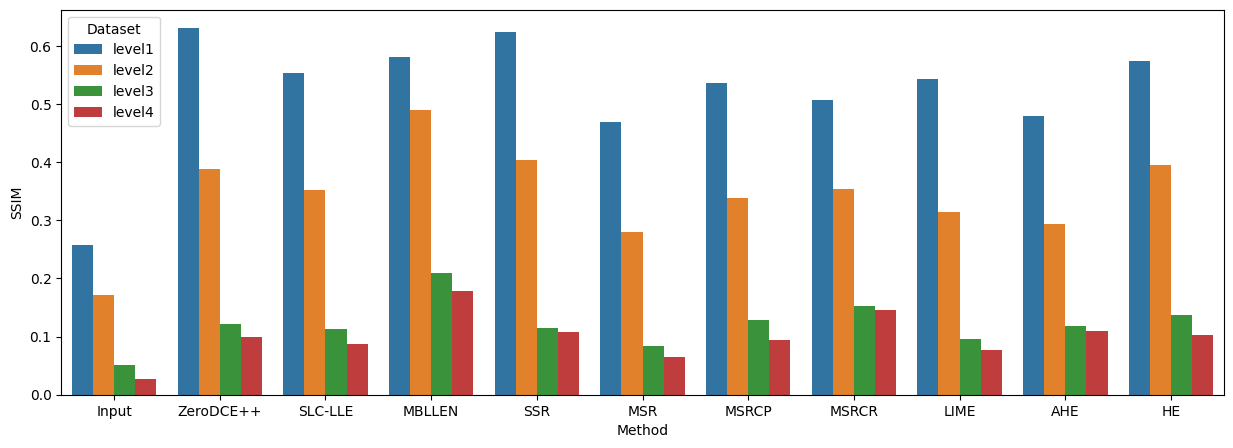

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Method', y='SSIM', hue='Dataset')

In [12]:
df_ref = pd.read_excel('./ref_res.xlsx')
df_ref.head(5)

,Pristine,level1,level2,level3,level4
0,0.884,0.857,0.750,0.510,0.360
1,0.000,0.027,0.134,0.374,0.524


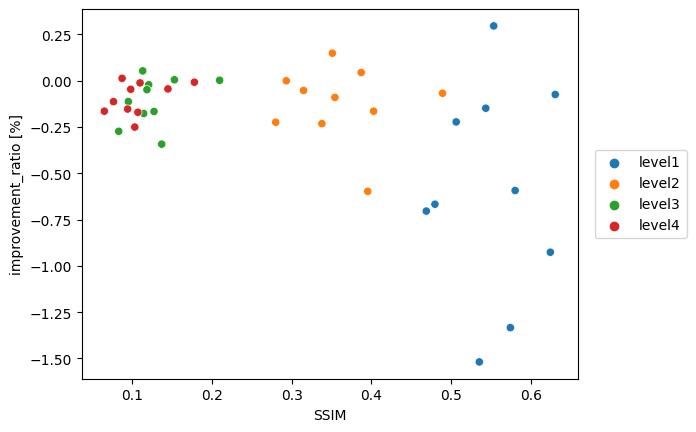

In [13]:
df_temp = df.copy().reset_index()
df_temp.drop(index=np.where(df_temp['Method'] == 'Input')[0], inplace=True)
df_temp.loc[:, 'ref_accuracy'] = 0 
df_temp.loc[:, 'potential_improve'] = 0 
for i in range(1, 5):
    df_temp.loc[df_temp['Dataset']==f'level{i}', 'ref_accuracy']=df_ref.loc[0, f'level{i}']
    df_temp.loc[df_temp['Dataset']==f'level{i}', 'potential_improve']=df_ref.loc[1, f'level{i}']
df_temp['actually_improved'] = (df_temp['Accuracy'] - df_temp['ref_accuracy'])
df['improvement_ratio'] = df_temp['actually_improved']/df_temp['potential_improve']
ax = sns.scatterplot(x=df_temp['SSIM'], y=df['improvement_ratio'], hue=df_temp['Dataset'])
ax.set_ylabel('improvement_ratio [%]')
ax.set_xlabel('SSIM')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
#plt.title(f'level 2')

,Method,SSIM,Dataset,Accuracy,F1,improvement_ratio
0,Input,0.257699,level1,0.860,0.861,NaN
1,ZeroDCE++,0.630378,level1,0.855,0.856,-0.074074
2,SLC-LLE,0.553296,level1,0.865,0.866,0.296296
3,MBLLEN,0.580113,level1,0.841,0.842,-0.592593
4,SSR,0.624220,level1,0.832,0.834,-0.925926


Text(0.5, 23.52222222222222, 'Darkness')

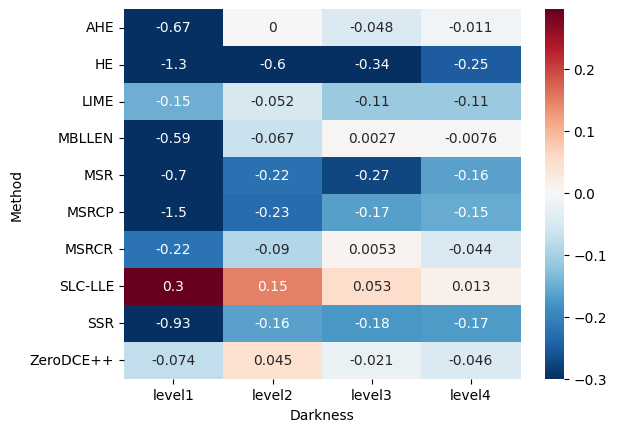

In [24]:
df.drop(index=np.where(df['Method'] == 'Input')[0], inplace=True)
glue = df.pivot("Method", "Dataset", "improvement_ratio")
sns.heatmap(glue, annot=True, cmap='RdBu_r', vmin=-0.3)
plt.ylabel('Method')
plt.xlabel('Darkness')
#plt.title('Dark images [%] Vs. Darkness - Improvement ratio [%]')

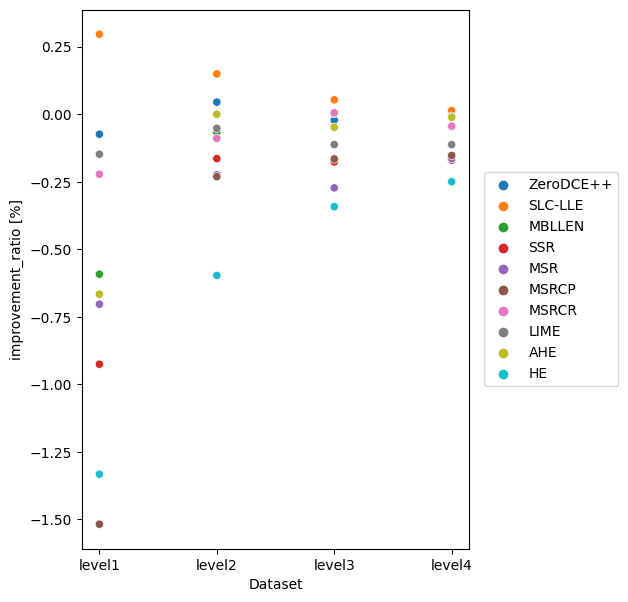

In [5]:
df_temp = df.copy().reset_index()
df_temp.drop(index=np.where(df_temp['Method'] == 'Input')[0], inplace=True)
df_temp.loc[:, 'ref_accuracy'] = 0 
df_temp.loc[:, 'potential_improve'] = 0 
for i in range(1, 5):
    df_temp.loc[df_temp['Dataset']==f'level{i}', 'ref_accuracy']=df_ref.loc[0, f'level{i}']
    df_temp.loc[df_temp['Dataset']==f'level{i}', 'potential_improve']=df_ref.loc[1, f'level{i}']
df_temp['actually_improved'] = (df_temp['Accuracy'] - df_temp['ref_accuracy'])
df['improvement_ratio'] = df_temp['actually_improved']/df_temp['potential_improve']
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x=df_temp['Dataset'], y=df['improvement_ratio'], hue=df_temp['Method'])
ax.set_ylabel('improvement_ratio [%]')
ax.set_xlabel('Dataset')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

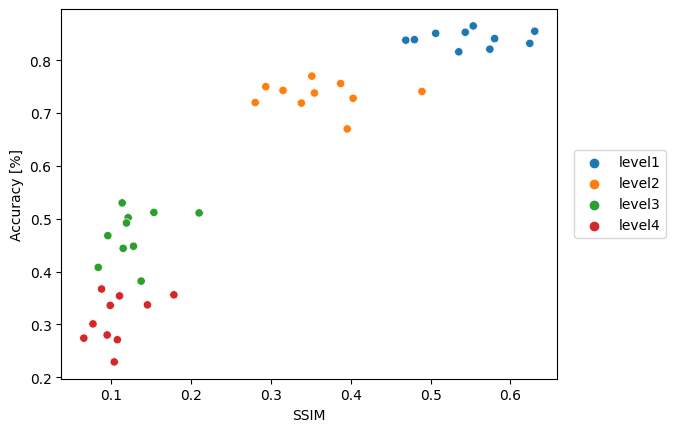

In [6]:
df_temp = df.copy().reset_index()#df[df['Dataset']==f'level2'].copy().reset_index()
df_temp.drop(index=np.where(df_temp['Method'] == 'Input')[0], inplace=True)
actually_improved = (df_temp['Accuracy'] - df_ref.loc[0, 'level2'])
#df_temp['improvement'] = 
ax = sns.scatterplot(x=df_temp['SSIM'], y=df_temp['Accuracy'], hue=df_temp['Dataset'] )
ax.set_ylabel('Accuracy [%]')
ax.set_xlabel('SSIM')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
#plt.title(f'level 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


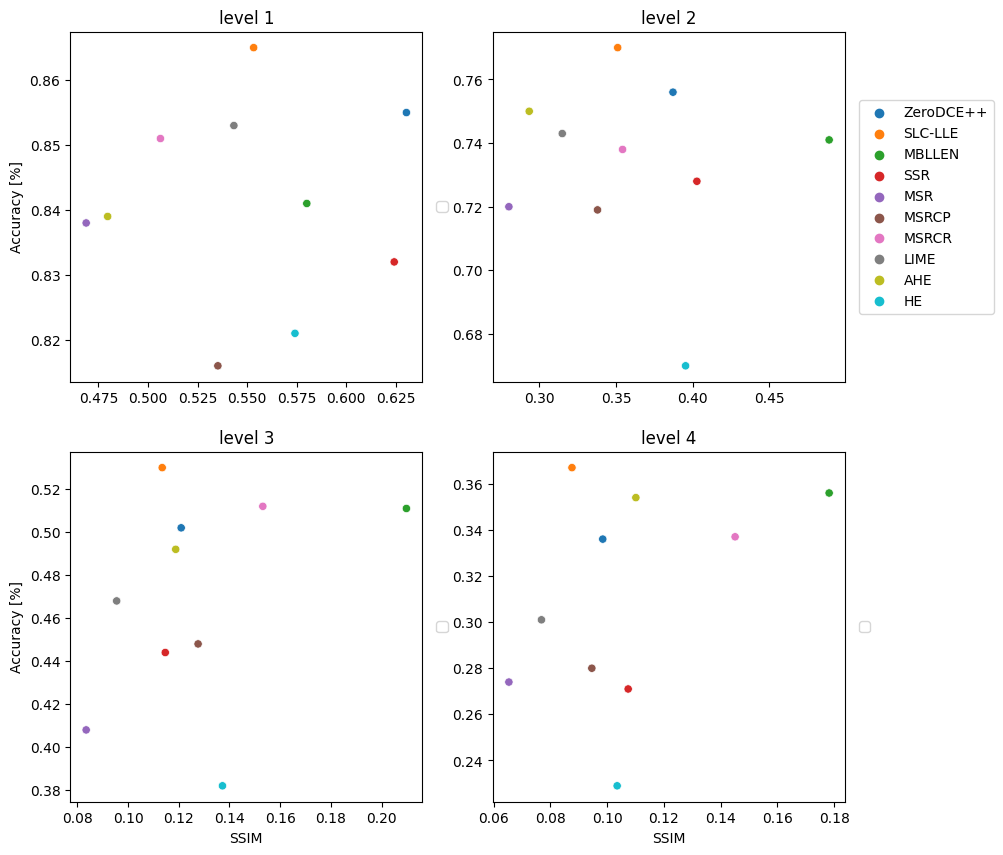

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
#fig.title('Accuracy Vs. SSIM')
i = 0
legend = False
for ax2 in axs:
    for ax in ax2:
        i+=1
        df_temp = df[df['Dataset']==f'level{i}'].copy().reset_index()
        df_temp.drop(index=np.where(df_temp['Method'] == 'Input')[0], inplace=True)
        if i==2:
            legend=True
        else:
            legend=False
        sns.scatterplot(x=df_temp['SSIM'], y=df_temp['Accuracy'], hue=df_temp['Method'], ax=ax, legend=legend, )

        ax.set_title(f'level {i}')
        if i==1 or i==3:
        #plt.scatter(df['SSIM'], df['Accuracy'], cmap=edgecolors='k')
        
            ax.set_ylabel('Accuracy [%]')
        else:
            ax.set_ylabel('')

        if i>2:    
            ax.set_xlabel('SSIM')
        else:
            ax.set_xlabel('')

        # 
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)


In [8]:
df_ref2 = df_ref.copy().T
df_ref2.reset_index(inplace=True)

df_ref2.head(5)


,index,0,1
0,Pristine,0.884,0.000
1,level1,0.857,0.027
2,level2,0.750,0.134
3,level3,0.510,0.374
4,level4,0.360,0.524


Text(0, 0.5, 'Accuracy [%]')

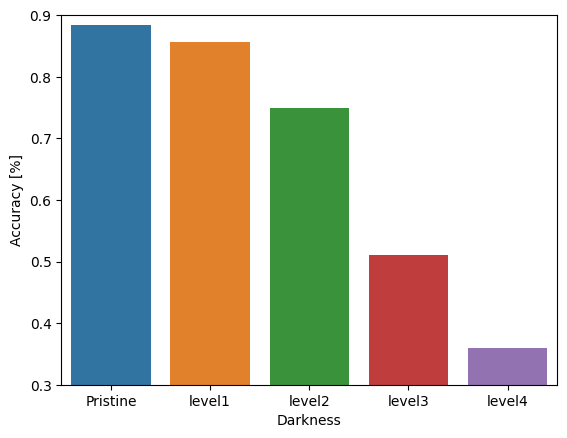

In [9]:

sns.barplot(data=df_ref2, x="index", y=0)
plt.ylim(bottom=0.3, top=0.9)
plt.xlabel('Darkness')
plt.ylabel('Accuracy [%]')



In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#load data

df = pd.read_excel('./aug_res2.xlsx')
df.drop(index=np.where(df['train_dark'] == 0)[0], inplace=True)
df.reset_index(inplace=True)
#df.drop(index=np.where(df['Dataset'] == 'Test')[0], inplace=True)

df.head(5)

,index,train_dark,Accuracy,F1-score,Dataset,ref_accuracy,ref_f1,actually_improved,potential_improve,improvement_ratio
0,5,0.2,0.885,0.884,Test,0.884,0.882,0.001,1.000,0.001000
1,6,0.2,0.860,0.859,level1,0.857,0.857,0.003,0.027,0.111111
2,7,0.2,0.791,0.789,level2,0.750,0.752,0.041,0.134,0.305970
3,8,0.2,0.579,0.581,level3,0.510,0.514,0.069,0.374,0.184492
4,9,0.2,0.401,0.402,level4,0.360,0.353,0.041,0.524,0.078244


* last 10 lines

* number of lines

Text(0.5, 23.52222222222222, 'Darkness')

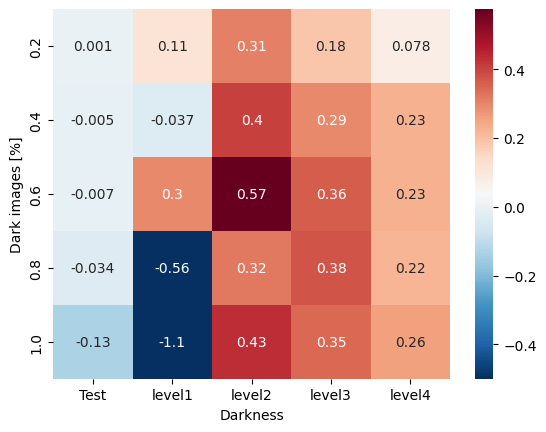

In [19]:
glue = df.pivot("train_dark", "Dataset", "improvement_ratio")
sns.heatmap(glue, annot=True, cmap='RdBu_r', vmin=-0.5)
plt.ylabel('Dark images [%]')
plt.xlabel('Darkness')
#plt.title('Dark images [%] Vs. Darkness - Improvement ratio [%]')



,index,Model,Dataset,acc_val,Accuracy,Precision,Recall,F1-score,ref_accuracy,actually_improved,potential_improve,improvement_ratio
0,0,Normal,Test,0,0.885,0.896,0.883,0.883,0.885,0.0,1.0000,0.0
1,1,Normal,ExDark_test,0,0.672,0.743,0.669,0.680,0.672,0.0,0.0956,0.0
2,2,Normal,level1,0,0.860,0.878,0.858,0.861,0.860,0.0,0.0270,0.0
3,3,Normal,level2,0,0.753,0.788,0.751,0.755,0.753,0.0,0.1340,0.0
4,4,Normal,level3,0,0.508,0.598,0.503,0.511,0.508,0.0,0.3740,0.0


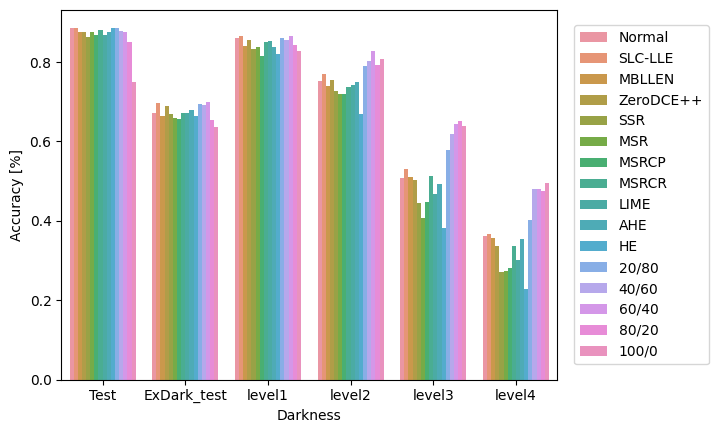

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#load data

df = pd.read_excel('./res_all.xlsx')
#df.drop(index=np.where(df['train_dark'] == 0)[0], inplace=True)
df.reset_index(inplace=True)
#df = df[df['Dataset']=='level1']
#df.drop(index=np.where(df['Dataset'] == 'Test')[0], inplace=True)
ax = sns.barplot(data=df, x="Dataset", y='Accuracy', hue='Model')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

plt.xlabel('Darkness')
plt.ylabel('Accuracy [%]')

df.head(5)

Text(0.5, 23.38159722222222, 'Datasets')

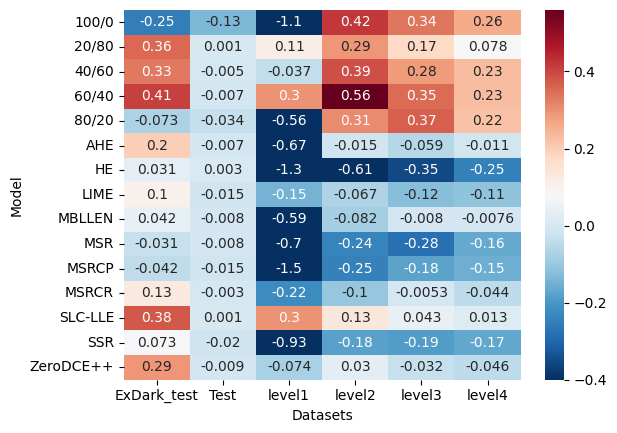

In [29]:
df.drop(index=np.where(df['Model'] == 'Normal')[0], inplace=True)
glue = df.pivot("Model", "Dataset", "improvement_ratio")
sns.heatmap(glue, annot=True, cmap='RdBu_r', vmin=-0.4)
#plt.ylabel('Dark images [%]')
plt.xlabel('Datasets')

* number of columns

* columns names

In [18]:
list(df.columns)

['user_id', 'age', 'gender', 'occupation', 'zip_code']

* index of the data frame is from line 0 to line 943


In [19]:
df.index

RangeIndex(start=0, stop=943, step=1)

* types of each column


In [20]:
df.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

* print occupation column

In [21]:
df['occupation']

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object

* unique values in occupation column

In [22]:
len(df['occupation'].unique())

21

* most used value in occupation

In [23]:
df['occupation'].value_counts().idxmax()

'student'

* age information

In [24]:
df['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

* description of all columns


In [25]:
df.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


the top occupation is student with 196 occurences

# Part B - Filtering and sorting

In [26]:
df = pd.read_csv('./army.csv')

* Veterans by index

In [27]:
veteranIndex = 6
df.iloc[:, [veteranIndex]]

,veterans
0,1
1,5
2,62
3,26
4,73
5,37
6,949
7,48
8,48
9,435


* Veteran and death columns by index

In [28]:
veteranIndex = 6
deathIndex = 3
df.iloc[:, [veteranIndex, deathIndex]]

,veterans,deaths
0,1,523
1,5,52
2,62,25
3,26,616
4,73,43
5,37,234
6,949,523
7,48,62
8,48,62
9,435,73


* deaths, size and deserters of Maine and alaska

In [29]:
df.loc[df['origin'].isin(['Maine', 'Alaska']), ['deaths', 'size', 'deserters']]

,deaths,size,deserters
4,43,1592,3
6,523,987,24


* line 3-7, columns 3-6

In [30]:
df.iloc[2:6, 2:5]

,company,deaths,battles
2,2nd,25,2
3,2nd,616,2
4,1st,43,4
5,1st,234,7


* all line after 4

In [31]:
df.iloc[3:, :]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
3,Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
4,Maine,Dragoons,1st,43,4,1592,73,2,0,3
5,Iowa,Dragoons,1st,234,7,1006,37,1,1,4
6,Alaska,Dragoons,2nd,523,8,987,949,2,0,24
7,Washington,Dragoons,2nd,62,3,849,48,3,1,31
8,Oregon,Scouts,1st,62,4,973,48,2,0,2
9,Wyoming,Scouts,1st,73,7,1005,435,1,0,3
10,Louisana,Scouts,2nd,37,8,1099,63,2,1,2
11,Georgia,Scouts,2nd,35,9,1523,345,3,1,3


* lines after 4, columns 1-2

In [32]:
df.iloc[:4, 0:2]

,origin,regiment
0,Arizona,Nighthawks
1,California,Nighthawks
2,Texas,Nighthawks
3,Florida,Nighthawks


* only columns 3-7

In [33]:
df.iloc[:, 2:7]

,company,deaths,battles,size,veterans
0,1st,523,5,1045,1
1,1st,52,42,957,5
2,2nd,25,2,1099,62
3,2nd,616,2,1400,26
4,1st,43,4,1592,73
5,1st,234,7,1006,37
6,2nd,523,8,987,949
7,2nd,62,3,849,48
8,1st,62,4,973,48
9,1st,73,7,1005,435


* lines with only deaths above 50

In [34]:
df.loc[df['deaths'] > 50, :]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
0,Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
1,California,Nighthawks,1st,52,42,957,5,2,0,24
3,Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
5,Iowa,Dragoons,1st,234,7,1006,37,1,1,4
6,Alaska,Dragoons,2nd,523,8,987,949,2,0,24
7,Washington,Dragoons,2nd,62,3,849,48,3,1,31
8,Oregon,Scouts,1st,62,4,973,48,2,0,2
9,Wyoming,Scouts,1st,73,7,1005,435,1,0,3


* lines with deaths < 50 and deaths > 500

In [35]:
df.loc[(df['deaths'] < 50) | (df['deaths'] > 500), :]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
0,Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
2,Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
3,Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
4,Maine,Dragoons,1st,43,4,1592,73,2,0,3
6,Alaska,Dragoons,2nd,523,8,987,949,2,0,24
10,Louisana,Scouts,2nd,37,8,1099,63,2,1,2
11,Georgia,Scouts,2nd,35,9,1523,345,3,1,3


* lines regiments different than dragoons

In [36]:
df.loc[df['regiment'] != 'Dragoons', :]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
0,Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
1,California,Nighthawks,1st,52,42,957,5,2,0,24
2,Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
3,Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
8,Oregon,Scouts,1st,62,4,973,48,2,0,2
9,Wyoming,Scouts,1st,73,7,1005,435,1,0,3
10,Louisana,Scouts,2nd,37,8,1099,63,2,1,2
11,Georgia,Scouts,2nd,35,9,1523,345,3,1,3


* only arizona and texas

In [37]:
df.loc[(df['origin'] == 'Arizona') | (df['origin'] == 'Texas'), :]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
0,Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
2,Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


* third line for deaths column

In [38]:

df['deaths'][2]

25

# Part C - Grouping

In [39]:
df = pd.read_csv('./occupation.csv')

* average age

In [40]:
df['age'].mean()

34.05196182396607

* average age by gender

In [41]:
df.groupby(['gender'])['age'].mean()

gender
F    33.813187
M    34.149254
Name: age, dtype: float64

* average age by occupation

In [42]:

df.groupby(['occupation'])['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

* percent of men in each occupation

In [43]:
(df.loc[(df['gender'] == 'M')].groupby(['occupation'])['age'].count() / df.groupby(['occupation'])['age'].count() * 100).sort_values()

occupation
homemaker         14.285714
healthcare        31.250000
librarian         43.137255
artist            53.571429
administrator     54.430380
none              55.555556
writer            57.777778
marketing         61.538462
other             65.714286
student           69.387755
educator          72.631579
salesman          75.000000
lawyer            83.333333
entertainment     88.888889
scientist         90.322581
executive         90.625000
programmer        90.909091
retired           92.857143
technician        96.296296
engineer          97.014925
doctor           100.000000
Name: age, dtype: float64

* occupation age info

In [44]:
df.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,79.0,38.746835,11.123397,21.0,30.00,37.0,48.00,70.0
artist,28.0,31.392857,8.668116,19.0,25.00,30.0,39.00,48.0
doctor,7.0,43.571429,12.501428,28.0,35.50,45.0,48.50,64.0
educator,95.0,42.010526,10.413264,23.0,33.00,42.0,50.00,63.0
engineer,67.0,36.388060,11.199236,22.0,28.00,36.0,43.00,70.0
entertainment,18.0,29.222222,10.056052,15.0,23.00,25.0,33.00,50.0
executive,32.0,38.718750,10.608075,22.0,31.00,38.5,46.00,69.0
healthcare,16.0,41.562500,11.313524,22.0,30.50,44.5,49.25,62.0
homemaker,7.0,32.571429,10.737119,20.0,24.50,32.0,38.50,50.0


* average age for occupation and gender

In [45]:
df.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

* average age for occupation and gender

In [46]:
df.groupby(['occupation', 'gender'])['age'].count() / df.groupby(['occupation'])['age'].count() * 100

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Part D - Apply

In [47]:
df = pd.read_csv('./crime_USA.csv')

* cast year to datetime64

In [48]:
print('before ', df['Year'].dtypes)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
print('after ', df['Year'].dtypes)

before  int64
after  datetime64[ns]


* index by year


In [49]:
df.set_index('Year', inplace=True)
df.head(10)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


* Remove Total column

In [50]:
df.drop(axis=1, columns=['Total'], inplace=True)
df.head(1)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200


* Sum every 10 years

In [51]:
df = df.resample('10Y').sum()
df

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-12-31,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1970-12-31,1938965298,4585290,49424400,113070,257520,1875530,2339170,14614000,28918100,5892300
1980-12-31,2143307264,10213630,96088300,199270,599570,4375000,5039800,30076200,56068900,9943200
1990-12-31,2394730678,14549938,117640700,206839,885209,5456539,8001340,32352194,72849053,12439611
2000-12-31,2645537291,17132404,116580585,203810,986445,5517676,10425809,25727107,76705256,14148520
2010-12-31,2975877430,13793818,99874408,162254,917914,4191439,8522262,21682641,67203302,10992397
2020-12-31,1260816088,4820769,34983325,58095,335466,1380720,2982298,7956713,24197097,2829515


* most dangerous decade for each column

In [52]:
df.drop(axis=1, columns=['Population', 'Property'], inplace=True)
df.apply(lambda x: x.index[x.argmax()], axis=0)


Violent              2000-12-31
Murder               1990-12-31
Forcible_Rape        2000-12-31
Robbery              2000-12-31
Aggravated_assault   2000-12-31
Burglary             1990-12-31
Larceny_Theft        2000-12-31
Vehicle_Theft        2000-12-31
dtype: datetime64[ns]

# Part E - Visualization

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* plt Scatter tip to total bill

Text(0.5, 0, 'total_bill')

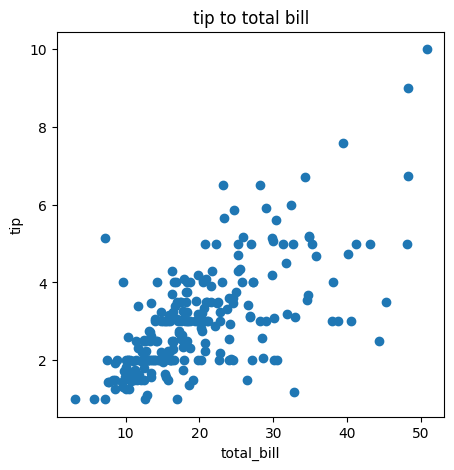

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(df['total_bill'], df['tip'])
plt.title('tip to total bill')
plt.ylabel('tip')
plt.xlabel('total_bill')

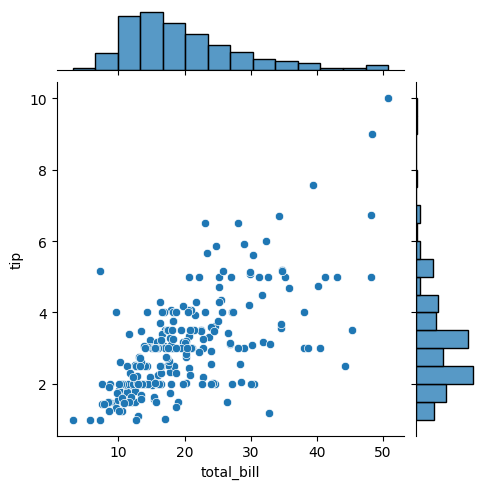

In [55]:
#SNS "
sns.jointplot(x=df['total_bill'], y=df['tip'], height=5)

* Boxplot Famale / Male ratio total bill

<AxesSubplot:xlabel='Male'>

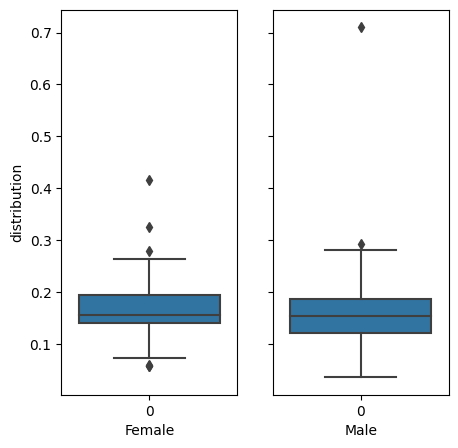

In [56]:
df['ratio_F'] = df.loc[df['sex'] == 'Female', 'tip'] / df.loc[df['sex'] == 'Female', 'total_bill']
df['ratio_M'] = df.loc[df['sex'] == 'Male', 'tip'] / df.loc[df['sex'] == 'Male', 'total_bill']
fig, axs = plt.subplots(1,2, figsize=[5,5], sharey=True)
axs[0].set_ylabel('distribution')
axs[0].set_xlabel('Female')
axs[1].set_xlabel('Male')
sns.boxplot(data=df['ratio_F'], ax = axs[0])
sns.boxplot(data=df['ratio_M'], ax = axs[1])

* Total bill histogram

Text(0.5, 0, 'bill')

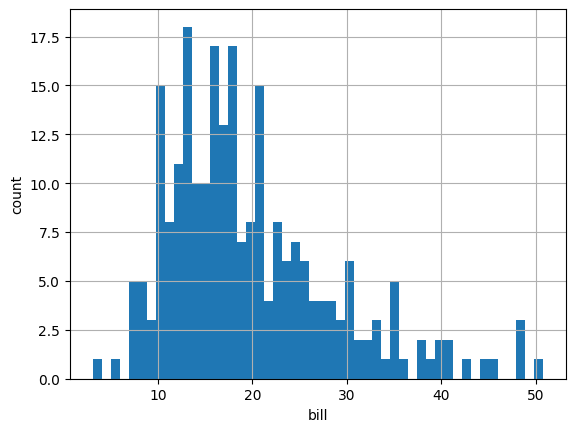

In [57]:
df['total_bill'].hist(bins=50)
plt.ylabel('count')
plt.xlabel('bill')

* tip - total bill

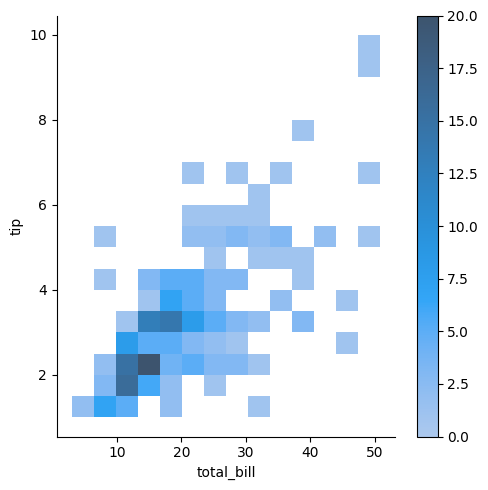

In [58]:
sns.displot(data=df, x='total_bill', y='tip', cbar=True)

* total bill distribution for each day

<AxesSubplot:xlabel='day', ylabel='total_bill'>

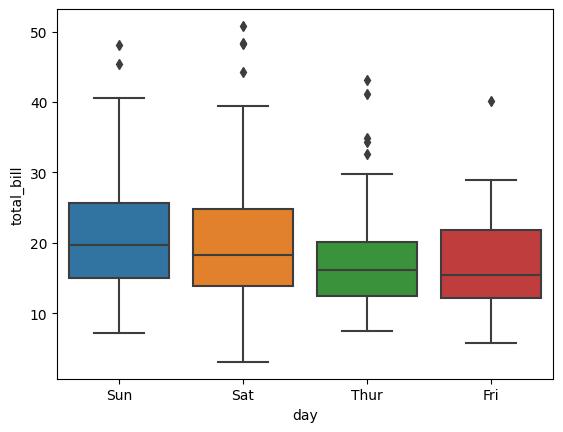

In [59]:
sns.boxplot(data=df, x='day', y='total_bill')

* scatter plot for the tip in each day

<AxesSubplot:xlabel='tip', ylabel='day'>

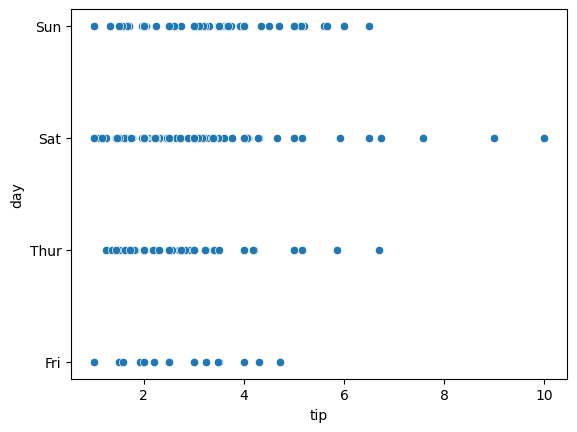

In [60]:
sns.scatterplot(x=df['tip'], y=df['day'])

* box plot for the tip in each day and meal type

<AxesSubplot:xlabel='day', ylabel='total_bill'>

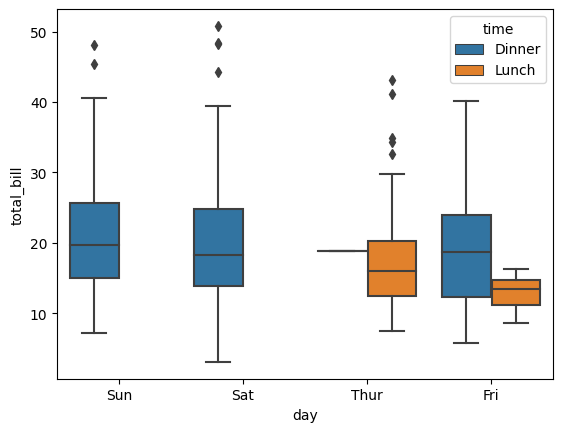

In [61]:
sns.boxplot(data=df, x='day', y='total_bill', hue=df['time'])

* histogram of tips with the meal type

<AxesSubplot:xlabel='tip', ylabel='Count'>

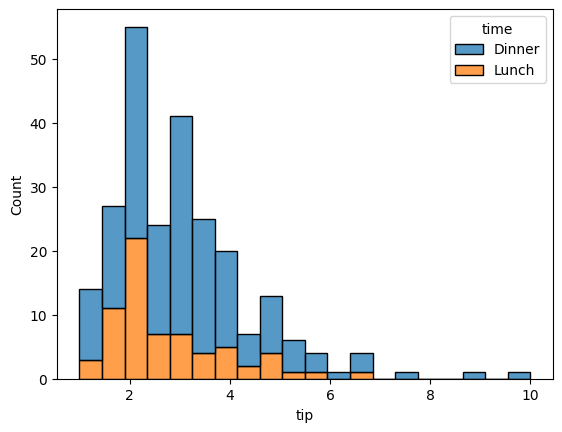

In [62]:
sns.histplot(data=df, x='tip', hue='time', bins=20, multiple='stack')

* scatter of total bill to tip with smoker colors

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

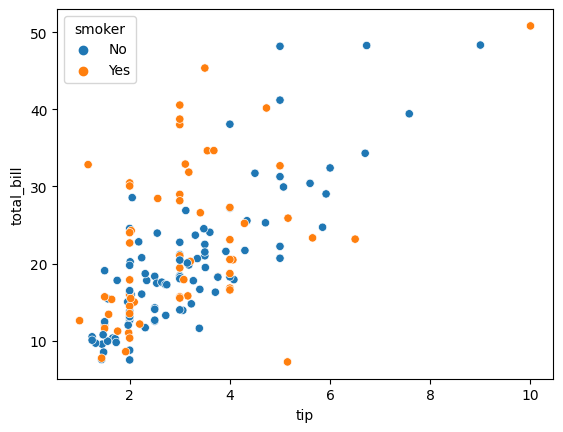

In [63]:
df_gever = df.loc[df['sex'] == 'Male']
sns.scatterplot(x=df_gever['tip'], y=df_gever['total_bill'], hue=df_gever['smoker'])